# [Python] DataFrame 다루기
## o 필요한 라이브러리
 - pandas,
 - 설치 : pip install pandas \\ 사용 : import pandas

## o 자료 만들기
  - 자료 처리 방법
      * 주로 파일 또는 API를 이용하여 DATA를 가져와서 처리하는 방법이다.
      * 관련 라이브러리(json, os, requests,등)가 크게 필요치 않다.
      * read_json, read_excel, read_sql등 데이터를 로드하는데 필요한 것을 제공한다.
      * 로딩 코드는 다음과 같다.
      
>```python
import pandas
df = pandas.read_json(filePath, encoding='utf-8')
```
      
- 자료 변환방법
    * 부득이하게 데이터를 가져와서 DataFrame으로 변환 할 경우는 다음과 같이 한다.
    * **DataFrame(데이터명, columns=['',...])**
    
>```python
import pandas
df = DataFrame(xdata, columns=['변경컬럼1','변경컬럼2',...])
```

- 자료 저장방법
    * 원하는 DataFrame(data set)을 만든 후 저장할 때는 .to_csv 등으로 저장한다.
    * **df.to_csv('파일경로.csv',sep=',',encoding='utf-8')**
    
>```python
import pandas
df.to_csv('./total.csv',sep='\t')
```

 
## o 자료 구조 확인하는 함수
  - data가 df라고 있다고 가정한다.
  

함수명 | 사용법 | 설명|결과
:-:|:-:|--:|--:
head(10) | df.head(10) | *DataFrame의 **상위 10개**의 데이터를 확인* | table형태
tail(10) | df.tail(10) | *DataFrame의 **하위 10개**의 데이터를 확인* | table형태
index | df.index | * DataFrame의 **인덱스**를 확인* | (start=시작, stop=끝, step=증가)
columns | df.columns | * DataFrame의 **컬럼** 확인* | 열(컬럼) 목록을 list로 반환
values | df.values | * DataFrame의 **값**을 확인 * | 값들을 2차원 리스트로 반환
info | df.info | * DataFrame에 관한 **정보**를 확인 | 데이터 + shape 정보 반환
shape | df.shape | * DataFrame의 **행/열의 갯수**를 확인 | 행과 열수 반환 (1252, 7)
isnull().sum() | df **.isnull().sum()** | * DataFrame의 data 중  **결측치 갯수** 확인 | 각 열별 결측치 갯수 반환
describe() | df.describe() | * DataFrame에서 기본 통계량을 확인 * | count,sum, mean,<br> max, min, 등의 값을 자동계산하여 보여줌 
unique() | df.컬럼명.unique() | * DataFrame의 컬럼에 대하여 유니크한 값만 확인*| unique한 값을 list로 반환
 
 
 ## o 컬럼과 열 자료 탐색하기
  - data가 df이고, 컬럼(열)이 컬럼1, 컬럼2, 행1,행2 등이 있다고 가정한다.
  
사용법 | 설명 | 비고
:---:|---:|---:
df.컬럼1<br>or<br>df['컬럼1'] | 컬럼1에 대한 데이터를 조회한다. |
df[['컬럼1','컬럼2',...]] | 2개이상의 컬럼을 선택할때 사용한다. | 2개이상시 [[..]]으로함.
df['컬럼명'] = [값1, 값2,...] | 해당 컬럼의 값을 변경하거나, 새로 열을 추가할 때 사용한다.| 아래 처럼 값을 계산하여 처리시 사용함.
df['add'] = df['컬럼1']-df['컬럼2'] | add라는 열을 추가하는데 컬럼1-컬럼2의 결과를 추가한다.|
df.loc[열인덱스] | 열인덱스에 대한 열자료를 출력한다.|
df.loc[[1000,20,800],['열1','열2']] | 여러개를 선택 출력시 사용한다.| 1:2 와같이 범위 가능
df.iloc[[100,200]] | 여러개 행에 대한 모든 행값을 출력<br>인덱스 숫자로 탐색하는 것임. | df.loc[[100,200],[1,2,3]] 와같음<br>*열선택시 [1,2,3]처럼 인덱스로 조회함.*

 ## o 조건 탐색하기
  - **loc 함수를 이용한다.**
  - 주로 loc를 사용하여 조건을 처리하며, &는 and, |은 or연산자임.
  - isin()는 해당 열의 값이 일치하는 자료를 탐색하기 위해서 사용한다.
  
  
``` python
df.loc[(df['열1']=='abc')&(df['열2']>3),:]
# df에서 열1의 컬럼 값이 abc이고, 열2의 값이 3이상인 것 중 모든 row를 추출한다.

# guareaName 열에서 영등포구 또는 서초구가 있는 것을 뽑는다.
df.loc[df['guareaName'].isin(['영등포구','서초구']),:].head(3)
```

## o 정렬하기
 
  - **sort_index(), sort_values()** 함수를 사용한다.
  - sort_index는 인덱스 순서대로 정렬하는 것이고,
  - sort_values는 지정한 열에 따라 정렬방식을 지정한다.
  - axis = 0 인 경우는 행방향 정렬이고, 1인경우는 열에 대한 정렬이다.
  - ascending= True/False는 오름차순 할 것인지 아닌지 지정 
  - by=['열1','열1'] 은 기준이 되는 열(columns)을 지정하는 것으로 2개 이상시 [ ]를 사용한다.
  
```sass
# index로 정렬한다.
df.loc[df['열']=='송파구',:].sort_index(axis=0/1, ascending=False/True)

# 지정한 열에 따라 정렬한다. 이때 오름차순/내림차순 정렬을 지정할 수 있다.
df.loc[df['열']=='송파구',:].sort_values(by='열명', asending=False/True)
```

## o pandas 제공 통계함수

  - **기본 통계함수**를 이용하여 기본적 데이터 분석시 유용하게 사용된다.
    - <span style="color:blue;font-weight:bold">count()</span> : 전체 성분에서 NaN이 아닌 값의 갯수를 계산한다.
    - <span style="color:blue;font-weight:bold">value_counts()</span> : 해당 열에 대한 빈도수 계산한다.
    - <span style="color:blue;font-weight:bold">min(), max()</span> : 전체 성분의 최소값, 최대값을 구한다.
    - <span style="color:blue;font-weight:bold">sum()</span> : 합을 계산한다.
    - <span style="color:blue;font-weight:bold">mean()</span> : 평균값을 계산한다.
    - <span style="color:blue;font-weight:bold">std()</span> : 표준편차 계산
    - <span style="color:blue;font-weight:bold">var()</span> : 분산을 계산한다.
    - <span style="color:blue;font-weight:bold">mad()</span> : 평균값으로 부터의 절대 편차의 평균을 계산
    - <span style="color:blue;font-weight:bold">median()</span> : 중값값을 반환
    - <span style="color:blue;font-weight:bold">quantile()</span> : 특정 4분위에 해당하는 값을 반환(0~1사이)
    - <span style="color:blue;font-weight:bold">cumsum()</span> : 맨 첫번째 성분부터 누적의 합을 계산(0부터 합)
    - <span style="color:blue;font-weight:bold">cumprod()</span> : 맨 첫번째 성분부터 누적의 곱을 계싼(!부터곱)
    - <span style="color:red;font-weight:bold">argmin(), argmax()</span> : 전체 성분의 최소/최대값이 위치한 인덱스값을 반환
    
    
  - **상관관계 분석함수**가 다음과 같이 제공된다.
    - <span style="color:red;font-weight:bold">corr()</span> : 상관관계(Correlation coefficient) 계산, 
    - <span style="color:red;font-weight:bold">cov()</span> : 공분산(Covariance) 계산
    
   ``` python
        import pandas

        # DataFrame에서 열1과 열2의 상관관계 분석
        df['열1'].corr(df['열2'])

        # DataFrame에서 열1과 열2의 공분산 분석
        df['열1'].cov(df['열2'])
    ```
    
    
## o 데이터 합치기
 
  - **join()** 함수와 **merge()**함수, **concat()**함수를 사용한다.
      - **join 함수**
      - ** merge 함수**
          - 사용법 : 
          pandas.merge(df1, df2, how='left/right/inner/outer', on='열2')
          - how : 합치는 방법으로 left조인, right조인, inner, outer 중 택1하며, 기본은 inner 조인이다.
          - on : 양쪽다 있는 기준 키열을 선택한다.
          - left_on/right_on 은 좌측의 우측의 기준 키열을 지정한다.
          - indicator = False/True/'열명' 은 조인의 방향정보를 생성해 준다.
```python
pd.merge(left, right, # merge할 DataFrame 객체 이름
         how='inner', # left, rigth, inner (default), outer
         on=None, # merge의 기준이 되는 Key 변수
         left_on=None, # 왼쪽 DataFrame의 변수를 Key로 사용
         right_on=None, # 오른쪽 DataFrame의 변수를 Key로 사용
         left_index=False, # 만약 True 라면, 왼쪽 DataFrame의 index를 merge Key로 사용
         right_index=False, # 만약 True 라면, 오른쪽 DataFrame의 index를 merge Key로 사용
         sort=True, # merge 된 후의 DataFrame을 join Key 기준으로 정렬
         suffixes=('_x', '_y'), # 중복되는 변수 이름에 대해 접두사 부여 (defaults to '_x', '_y'
         copy=True, # merge할 DataFrame을 복사
         indicator=False) # 병합된 이후의 DataFrame에 left_only, right_only, both 등의 출처를 알 수 있는 부가 정보 변수 추가
```


In [143]:
%matplotlib nbagg
import json
import pandas
import matplotlib
from matplotlib import pyplot as plt


## matplotlib의 한글 사용을 위해 필수 코딩사항
font_location ='C:/Windows/Fonts/HYKANB.TTF'
font_name = matplotlib.font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

In [140]:
fileName = 'D:/dev_app/unclepig_prj/prj_scrap/Data/reData/(AREA)bikeMappingData_20180428[JSON].json'
df = pandas.read_json(fileName, encoding='utf-8')
df.head(3)

,guareaId,guareaName,stationId,stationLatitude,stationLongitude,stationName,stationUseYn
0,23,송파구,ST-1070,37.505932,127.107750,1251. 석촌역 2번출구,Y
1,23,송파구,ST-1072,37.501652,127.128181,1253. 오금역 3번 출구 뒤,Y
2,23,송파구,ST-1075,37.491131,127.125809,1256. 문정현대아파트 교차로,Y


In [29]:
print(df.index)
print('------------------------------------------------------------------------')
print(df.shape)
print('------------------------------------------------------------------------')
print(df.columns)
print('------------------------------------------------------------------------')
print(df.values)
print('------------------------------------------------------------------------')
print(df.info)
print('------------------------------------------------------------------------')
print(df.head(3))
print('------------------------------------------------------------------------')
print(df.tail(3))

RangeIndex(start=0, stop=1252, step=1)
------------------------------------------------------------------------
(1252, 7)
------------------------------------------------------------------------
Index(['guareaId', 'guareaName', 'stationId', 'stationLatitude',
       'stationLongitude', 'stationName', 'stationUseYn'],
      dtype='object')
------------------------------------------------------------------------
[[23 '송파구' 'ST-1070' ... '127.107750' '1251. 석촌역 2번출구' 'Y']
 [23 '송파구' 'ST-1072' ... '127.128181' '1253. 오금역 3번 출구 뒤' 'Y']
 [23 '송파구' 'ST-1075' ... '127.125809' '1256. 문정현대아파트 교차로' 'Y']
 ...
 [21 '강동구' 'ST-504' ... '127.173950' '1021. 강일동 리슈빌 빌딩앞' 'Y']
 [21 '강동구' 'ST-505' ... '127.138031' '1022. 길동 사거리(초소앞)' 'Y']
 [21 '강동구' 'ST-830' ... '127.135406' '1018. 둔촌 주공 GS 맞은편' 'Y']]
------------------------------------------------------------------------
<bound method DataFrame.info of       guareaId guareaName stationId stationLatitude stationLongitude  \
0           23        송파구   ST

In [32]:
df.isnull().sum() # 결측치 갯수 확인

guareaId            0
guareaName          0
stationId           0
stationLatitude     0
stationLongitude    0
stationName         0
stationUseYn        0
dtype: int64

In [34]:
df.describe() #현 데이터에서는 의미 없음.

,guareaId
count,1252.000000
mean,21.953674
std,7.337873
min,2.000000
25%,15.000000
50%,22.000000
75%,29.000000
max,34.000000


In [42]:
df.guareaName.unique()

array(['송파구', '성북구', '중랑구', '노원구', '도봉구', '금천구', '구로구', '동작구', '관악구',
       '서초구', '강남구', '강북구', '시험용(사용불가)', '강서구', '종로구', '중구', '마포구',
       '서대문구', '성동구', '광진구', '동대문구', '양천구', '용산구', '영등포구', '은평구', '강동구'],
      dtype=object)

In [48]:
df['guareaName'].head(10)

0    송파구
1    송파구
2    송파구
3    송파구
4    송파구
5    송파구
6    송파구
7    송파구
8    송파구
9    송파구
Name: guareaName, dtype: object

In [57]:
df[['guareaName','guareaId']].head(3)

,guareaName,guareaId
0,송파구,23
1,송파구,23
2,송파구,23


In [67]:
df.loc[[1000,20,800],]

,guareaId,guareaName,stationId,stationLatitude,stationLongitude,stationName,stationUseYn
1000,16,동대문구,ST-402,37.587517,127.052773,635. 시조사 앞 (청량고정문 옆),Y
20,23,송파구,ST-1410,37.497517,127.154678,1279. 마천금호어울림 1차아파트 건너편,Y
800,12,마포구,ST-87,37.568420,126.899429,419. 홈플러스 앞,Y


In [76]:
df.iloc[[1000,20,800], [0,1,5]]

,guareaId,guareaName,stationName
1000,16,동대문구,635. 시조사 앞 (청량고정문 옆)
20,23,송파구,1279. 마천금호어울림 1차아파트 건너편
800,12,마포구,419. 홈플러스 앞


In [115]:
df.loc[df['guareaName']=='강남구',:].head(3)

,guareaId,guareaName,stationId,stationLatitude,stationLongitude,stationName,stationUseYn
490,33,강남구,ST-1170,37.526844,127.028259,2361. 압구정역 교차로,Y
491,33,강남구,ST-1171,37.517635,127.022453,2362. 신사동 가로수길 입구,Y
492,33,강남구,ST-1172,37.519180,127.027466,2363. 강남 을지병원 교차로,Y


In [113]:
df.loc[df['guareaName']=='강남구',:].sort_index().head(3)

,guareaId,guareaName,stationId,stationLatitude,stationLongitude,stationName,stationUseYn
490,33,강남구,ST-1170,37.526844,127.028259,2361. 압구정역 교차로,Y
491,33,강남구,ST-1171,37.517635,127.022453,2362. 신사동 가로수길 입구,Y
492,33,강남구,ST-1172,37.519180,127.027466,2363. 강남 을지병원 교차로,Y


In [114]:
df.loc[df['guareaName']=='강남구',:].sort_values(by='stationName', 
                                              ascending=False).head(3)

,guareaId,guareaName,stationId,stationLatitude,stationLongitude,stationName,stationUseYn
508,33,강남구,ST-1407,37.472454,127.096077,2387. 래미안강남힐즈 사거리,Y
507,33,강남구,ST-1365,37.513950,127.030151,2385. 학동역,Y
506,33,강남구,ST-1248,37.466328,127.094887,2383. 보금자리정원,Y


In [132]:
guofstation = df['guareaName'].value_counts()
df['guareaName'].value_counts().head(3)

영등포구    75
강남구     75
서초구     75
Name: guareaName, dtype: int64

In [146]:
guofstation.index
type(guofstation)

pandas.core.series.Series

In [119]:
df.loc[df['guareaName'].isin(['영등포구','서초구']),:].head(3)

,guareaId,guareaName,stationId,stationLatitude,stationLongitude,stationName,stationUseYn
415,32,서초구,ST-1158,37.490540,127.008163,2266. 서초역 3번출구,Y
416,32,서초구,ST-1160,37.502319,127.022270,2268. 서초4동주민센터,Y
417,32,서초구,ST-1161,37.510349,127.016052,2269. 주홍교 하부,Y


In [167]:
guofstation.plot(kind='bar')

<IPython.core.display.Javascript object>


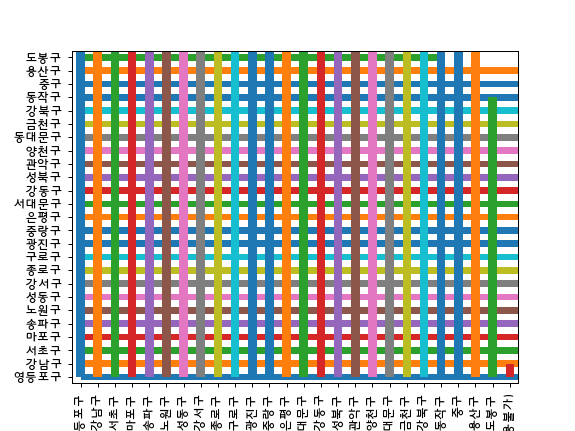

In [166]:
guofstation['시험용(사용불가)']
guofstation_c =guofstation[0:len(guofstation)-1]

guofstation_c.plot(kind='barh')